In [1]:
import pandas as pd
from pystan import StanModel
import pickle

In [2]:
loserwinner = pd.read_csv('output/data_kaimei.csv', index_col=0)

In [3]:
loserwinner = loserwinner[loserwinner['year'] > 2014]
loserwinner = loserwinner.reset_index(drop=True)

In [4]:
loserwinner

,loser,winner,year,month,day
0,栃煌山,白鵬,2015,1,1
1,高安,鶴竜,2015,1,1
2,栃ノ心,日馬富士,2015,1,1
3,宝富士,稀勢の里,2015,1,1
4,照ノ富士,琴奨菊,2015,1,1
5,勢,豪栄道,2015,1,1
6,安美錦,碧山,2015,1,1
7,逸ノ城,遠藤,2015,1,1
8,豊ノ島,常幸龍,2015,1,1
9,千代大龍,魁聖,2015,1,1


In [5]:
len(loserwinner['loser'].unique())

79

In [6]:
len(loserwinner['loser'].value_counts()[loserwinner['loser'].value_counts()<5])

4

In [7]:
len(loserwinner['winner'].value_counts()[loserwinner['winner'].value_counts()<5])

8

In [8]:
rare_rikishies = []
rare_rikishies.append(loserwinner['loser'].value_counts()[loserwinner['loser'].value_counts()<5].index)
rare_rikishies.append(loserwinner['winner'].value_counts()[loserwinner['winner'].value_counts()<5].index)
rare_rikishies = [rare_rikishi for loser_winner in rare_rikishies for rare_rikishi in loser_winner]

In [9]:
for rare_rikishi in rare_rikishies:
    loserwinner = loserwinner[loserwinner['loser'] != rare_rikishi]
    loserwinner = loserwinner[loserwinner['winner'] != rare_rikishi]
loserwinner = loserwinner.reset_index(drop=True)

In [10]:
loserwinner

,loser,winner,year,month,day
0,栃煌山,白鵬,2015,1,1
1,高安,鶴竜,2015,1,1
2,栃ノ心,日馬富士,2015,1,1
3,宝富士,稀勢の里,2015,1,1
4,照ノ富士,琴奨菊,2015,1,1
5,勢,豪栄道,2015,1,1
6,安美錦,碧山,2015,1,1
7,逸ノ城,遠藤,2015,1,1
8,豊ノ島,常幸龍,2015,1,1
9,千代大龍,魁聖,2015,1,1


In [11]:
len(loserwinner['loser'].unique())

72

In [12]:
len(loserwinner['winner'].unique())

72

In [13]:
rikishi_id = dict(zip(loserwinner['loser'].unique(), range(1, len(loserwinner['loser'].unique())+1)))

In [14]:
rikishi_id

{'佐田の富士': 35,
 '佐田の海': 14,
 '勢': 6,
 '北はり磨': 52,
 '北勝富士': 62,
 '北太樹': 45,
 '千代の国': 57,
 '千代丸': 19,
 '千代大龍': 10,
 '千代皇': 64,
 '千代翔馬': 58,
 '千代鳳': 12,
 '嘉風': 16,
 '大奄美': 69,
 '大栄翔': 51,
 '大砂嵐': 29,
 '大翔丸': 55,
 '天風': 59,
 '妙義龍': 13,
 '宇良': 60,
 '安美錦': 7,
 '宝富士': 4,
 '常幸龍': 37,
 '御嶽海': 53,
 '徳勝龍': 36,
 '日馬富士': 41,
 '旭大星': 67,
 '旭天鵬': 25,
 '旭秀鵬': 17,
 '明生': 72,
 '時天空': 18,
 '朝乃山': 68,
 '朝赤龍': 42,
 '松鳳山': 28,
 '栃ノ心': 3,
 '栃煌山': 1,
 '正代': 54,
 '照ノ富士': 5,
 '玉鷲': 26,
 '琴勇輝': 30,
 '琴奨菊': 32,
 '白鵬': 46,
 '石浦': 61,
 '碧山': 33,
 '稀勢の里': 31,
 '竜電': 70,
 '臥牙丸': 43,
 '英乃海': 49,
 '荒鷲': 38,
 '蒼国来': 15,
 '誉富士': 34,
 '豊ノ島': 9,
 '豊山': 66,
 '豊響': 11,
 '豪栄道': 22,
 '豪風': 27,
 '貴ノ岩': 47,
 '貴景勝': 63,
 '輝': 44,
 '逸ノ城': 8,
 '遠藤': 23,
 '里山': 50,
 '錦木': 56,
 '鏡桜': 20,
 '阿夢露': 39,
 '阿武咲': 65,
 '阿炎': 71,
 '隠岐の海': 40,
 '青狼': 48,
 '高安': 2,
 '魁聖': 24,
 '鶴竜': 21}

In [15]:
loserwinner = loserwinner.replace(rikishi_id)

In [16]:
loserwinner

,loser,winner,year,month,day
0,1,46,2015,1,1
1,2,21,2015,1,1
2,3,41,2015,1,1
3,4,31,2015,1,1
4,5,32,2015,1,1
5,6,22,2015,1,1
6,7,33,2015,1,1
7,8,23,2015,1,1
8,9,37,2015,1,1
9,10,24,2015,1,1


In [17]:
loserwinner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6452 entries, 0 to 6451
Data columns (total 5 columns):
loser     6452 non-null int64
winner    6452 non-null int64
year      6452 non-null int64
month     6452 non-null int64
day       6452 non-null int64
dtypes: int64(5)
memory usage: 252.1 KB


In [18]:
loserwinner['loser'].min()

1

In [19]:
loserwinner['loser'].max()

72

In [20]:
N = loserwinner['loser'].max()
M = loserwinner.shape[0]
Id = list(loserwinner[['loser', 'winner']].values)

data = dict(
    N=N,
    M=M,
    Id=Id
)

In [21]:
model = '''
data {
    int N;
    int M;
    int<lower=1, upper=N> Id[M, 2];
}

parameters {
    ordered[2] performance[M];
    vector[N] strength;
    real<lower=0> s_strength;
    vector<lower=0>[N] stability;
}

model {
    strength ~ normal(0, s_strength);
    stability ~ gamma(10, 10);
    for (i in 1:M)
        for (j in 1:2)
            performance[i, j] ~ student_t(1, strength[Id[i, j]], stability[Id[i, j]]);
}
'''

In [22]:
stanmodel = StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ed06970b37a91a165e1c573f42fa0311 NOW.


In [23]:
# ADVI (Automatic Differentiation Variational Inference)
fit_vb = stanmodel.vb(data=data, seed=123)
#about 30s

In [43]:
with open('5years_advi_modelresult.pkl', 'wb') as f:
    pickle.dump(stanmodel, f)
    pickle.dump(fit_vb, f)

In [25]:
#fit_vb.keys()

In [26]:
vb_sample = pd.read_csv(fit_vb['args']['sample_file'].decode('utf-8'), comment='#')
vb_sample = vb_sample.drop([0,1])

In [27]:
strength = vb_sample.filter(regex='strength\.\d+')

In [28]:
stability = vb_sample.filter(regex='stability\.\d+')

In [29]:
#fit = pystan.stan(model_code=model, data=data, chains=3, iter=500, warmup=100, thin=1)
# Elapsed Time: 153.73 seconds (Warm-up)
#               600.547 seconds (Sampling)
#               754.276 seconds (Total)

In [30]:
rikishi_df = pd.DataFrame(index=range(1, len(rikishi_id)+1), columns=['strength', 'stability'])

In [31]:
rikishi_df['name'] = rikishi_df.index

In [32]:
rikishi_df['strength'] = np.mean(strength).values
rikishi_df['stability'] = np.mean(stability).values

In [33]:
rikishi_id_inverse = dict(zip(rikishi_id.values(), rikishi_id.keys()))

In [34]:
rikishi_df = rikishi_df.replace(rikishi_id_inverse)

In [35]:
rikishi_df.index = rikishi_df['name'].values
rikishi_df = rikishi_df.drop('name', axis=1)

In [36]:
#rikishi_df

In [37]:
rikishi_df.sort_values(by='strength', ascending=False)

,strength,stability
白鵬,3.420505,2.301611
鶴竜,2.441583,2.312022
日馬富士,2.384805,2.218297
稀勢の里,2.289549,2.145279
豪栄道,1.465381,1.689284
高安,1.296749,2.031156
御嶽海,1.181826,1.813349
栃ノ心,1.080966,1.686051
琴奨菊,0.968661,1.604176
照ノ富士,0.941006,1.816346


In [38]:
rikishi_df.sort_values(by='strength', ascending=False)

,strength,stability
白鵬,3.420505,2.301611
鶴竜,2.441583,2.312022
日馬富士,2.384805,2.218297
稀勢の里,2.289549,2.145279
豪栄道,1.465381,1.689284
高安,1.296749,2.031156
御嶽海,1.181826,1.813349
栃ノ心,1.080966,1.686051
琴奨菊,0.968661,1.604176
照ノ富士,0.941006,1.816346


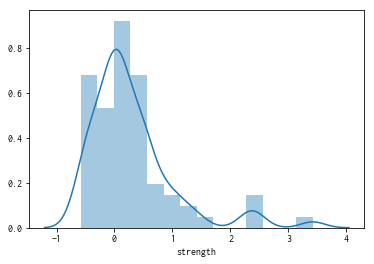

In [39]:
sns.distplot(rikishi_df['strength'])

In [40]:
strength

,strength.1,strength.2,strength.3,strength.4,strength.5,strength.6,strength.7,strength.8,strength.9,strength.10,...,strength.63,strength.64,strength.65,strength.66,strength.67,strength.68,strength.69,strength.70,strength.71,strength.72
2,0.741651,1.606780,0.781750,0.222841,0.895023,0.205184,0.127083,0.483576,0.330960,-0.039259,...,0.640605,0.177747,0.753229,0.196710,-0.241112,0.439616,0.373113,0.012503,0.752241,-0.548310
3,0.656800,1.351210,1.125480,0.511968,0.977720,0.095162,-0.011923,0.697125,0.126962,-0.179672,...,0.887463,0.037598,0.732646,0.122369,0.085798,1.031490,0.375360,0.062435,0.444326,-0.178756
4,0.456044,1.249530,1.485390,0.418836,0.959737,0.143440,0.058658,0.560151,-0.079740,0.030475,...,0.364200,-0.019912,0.090611,0.320241,-0.430388,0.834555,-0.241623,0.220478,0.094063,-0.375151
5,0.609627,1.243310,0.912657,0.420042,0.952030,0.149476,0.209342,0.638968,0.084525,0.305574,...,0.870640,0.057810,1.034190,-0.140064,-0.084694,1.103330,-0.156576,0.056338,0.255282,-0.179054
6,0.375569,1.351820,1.375260,0.422586,1.217220,0.081938,0.248727,0.597753,0.054135,0.011551,...,0.904840,-0.016615,0.874072,-0.025164,-0.155793,0.265049,0.116595,0.150812,0.612985,-0.567261
7,0.480287,1.323000,0.799872,0.448708,0.934796,0.208695,0.150374,0.779053,0.140861,0.321960,...,0.777165,-0.115706,0.914386,-0.020712,0.006320,0.526280,0.620006,0.029798,0.430738,-0.071464
8,0.618962,0.853383,1.028110,0.549537,0.894162,0.187311,0.004658,0.610379,0.356975,-0.073305,...,1.110220,0.153707,0.817709,-0.178180,-0.249512,0.119299,0.047075,0.030234,0.372957,0.140341
9,0.626016,1.397790,0.955298,0.530090,0.977224,0.254638,0.229935,0.545836,0.010831,0.254056,...,0.625215,-0.116458,0.783967,-0.117415,-0.029426,0.641008,-0.523464,-0.138555,0.115021,-0.214592
10,0.519483,1.322520,0.974221,0.467966,0.901677,0.320112,0.294917,0.610344,-0.004928,0.465516,...,0.789471,-0.194256,0.723689,-0.094464,-0.195492,0.197783,0.139882,0.020237,0.755027,-0.006568
11,0.325906,1.405940,0.995090,0.602551,0.907442,0.338916,0.127597,0.674668,0.317080,-0.075161,...,0.593328,0.024325,0.775037,-0.168344,0.064965,1.217020,-0.138179,0.010020,0.352847,-0.468147


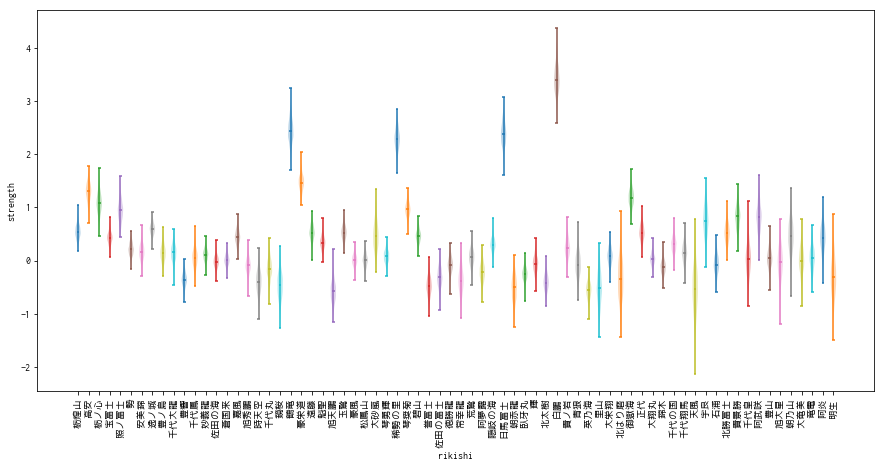

In [41]:
plt.figure(figsize=(15,7))
cmap = plt.cm.get_cmap('tab10')

for i in range(len(rikishi_id.keys())):
    g = plt.violinplot(strength.iloc[:, i], positions=[i], showmeans=False, showextrema=True, showmedians=True)
    c = cmap(i%10)
    for pc in g['bodies']:
        pc.set_facecolor(c)
    g['cbars'].set_edgecolor(c)
    g['cmaxes'].set_edgecolor(c)
    g['cmedians'].set_edgecolor(c)
    g['cmins'].set_edgecolor(c)

plt.xticks(list(range(len(rikishi_id.keys()))), rikishi_id.keys())
plt.xticks(rotation=90)

plt.xlabel('rikishi')
plt.ylabel('strength')
plt.savefig('output/rikishi_bayes_5years', dpi=200)
plt.show()

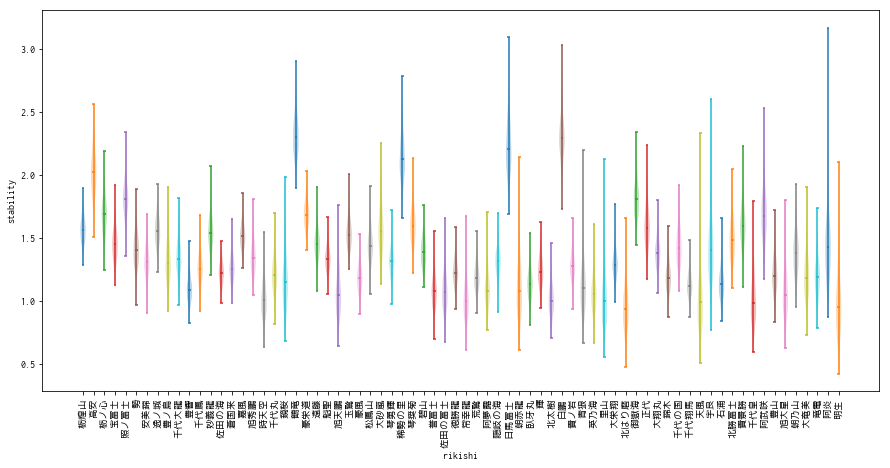

In [42]:
plt.figure(figsize=(15,7))
cmap = plt.cm.get_cmap('tab10')

for i in range(len(rikishi_id.keys())):
    g = plt.violinplot(stability.iloc[:, i], positions=[i], showmeans=False, showextrema=True, showmedians=True)
    c = cmap(i%10)
    for pc in g['bodies']:
        pc.set_facecolor(c)
    g['cbars'].set_edgecolor(c)
    g['cmaxes'].set_edgecolor(c)
    g['cmedians'].set_edgecolor(c)
    g['cmins'].set_edgecolor(c)

plt.xticks(list(range(len(rikishi_id.keys()))), rikishi_id.keys())
plt.xticks(rotation=90)

plt.xlabel('rikishi')
plt.ylabel('stability')
#plt.savefig('output/rikishi_bayes_5years', dpi=200)
plt.show()